In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

В этом задании две части - теоретическая и практическая. Теорию можно набирать в латехе или просто решить на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за задание - 10.

# Часть 1 (теоретическая).

## Задание 1 (**1.5 балла**).

Пусть $f(X)=ln(detX), X\in\mathbb{R}^{n\times n}$. Найдите производную $\nabla_X f(X).$

Для решения воспользуемся правилом дифференцирования сложной функции и таблицой стандартных производных для дифференцирования $detX$ [Матрично-векторное дифференцирование](http://www.machinelearning.ru/wiki/images/5/50/MOMO17_Seminar2.pdf):

**Решение**:


$\nabla_X f(X) = \frac{d}{dX}(ln(detX)) = \frac{d}{dX}(ln(detX)) * \frac{d}{dx}(detX) = \frac{1}{detX} * detX*X^{-T} = X^{-T}.$

## Задание 2 (**2 балла**).

Пусть $f(x)=x^Texp(xx^T)x, x\in\mathbb{R}^n,$ а $exp(B)$ - матричная экспонента, $B\in\mathbb{R}^{n\times n}.$ Матричной экспонентой обозначают ряд

$I_n+\frac{B}{1!}+\frac{B^2}{2!}+\dots=\sum\limits_{k=0}^{\infty}\frac{B^k}{k!}.$

Найдите производную $\nabla_x f(x).$

**Решение**:

$f(x) = x^Texp(xx^T)x = x^T\sum_{k=0}^\infty\frac{(xx^T)^k}{k!}x = \sum_{k=0}^\infty\frac{x^T(xx^T)^kx}{k!} = \sum_{k=0}^\infty\frac{(x^Tx)^{k+1}}{k!}$

$\nabla_x f(x) = \frac{d}{dx}f(x) = \frac{d}{dx^Tx} \sum_{k=0}^\infty\frac{(x^Tx)^{k+1}}{k!} *\frac{d}{dx}(x^Tx) = \sum_{k=0}^\infty\frac{(k + 1)}{k!}(x^Tx)^k 2x = (k+1)exp(x^Tx)2x$

## Задание 3 (**1.5 балла**).

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

**Решение:**

**1)** Найдем 1-ю производную:

$\nabla_w Q = \frac{d}{dw} (y^Ty - y^Txw - x^Tw^Ty + x^Tw^Txw) + \frac{d}{dw}(\lambda w^2) =$

$= -xy^T-x^Ty+2x^Txw + 2\lambda w = -2x^Ty + 2x^Txw + 2\lambda w $

Выведем $w$:

$-2x^Ty + 2x^Txw + 2\lambda w = 0$

Перенесем $-2x^Ty$ 

$2x^Txw + 2\lambda w = 2x^Ty$

Сократим все на 2

$x^Txw + \lambda w = x^Ty$

Вынесем $w$ за скобку, и чтобы можно было складывать $x^Tx$ и $\lambda$, умножим $\lambda$ на единичную матрицу

$(x^Tx +\lambda E)w = x^Ty$

Дальше переносим выражение в скобках и выражаем $w$

$w = (x^Tx+\lambda E)^{-1}x^Ty$

**2)** Найдем 2-ю производную:

$\nabla_w^2 Q = \frac{d}{dw}(-2x^Ty + 2x^Txw + 2\lambda w) = 2x^Tx +2\lambda E = x^Tx +\lambda E$ - здесь также умножили $\lambda$ на единичную матрицу, чтобы ее можно было складывать с $x^Tx$.

Убедимся, что мы в точке минимума:

$x^Tx = ||x||^2 >= 0$, причем нулю равно только когда $x = 0$

$=> x^Tx +\lambda E$ - положительно определена, что говорит о том, что мы оказались в точке минимума. [ml handbook, примеры вычисления второй производной](https://ml-handbook.ru/chapters/matrix_diff/intro#%D0%B2%D1%82%D0%BE%D1%80%D0%B0%D1%8F-%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F) 

## Часть 2 (практическая).

## Задание 4 (**1 балл**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

Аналитическая формула для нахождения весов:

$w = (X^TX)^{-1}X^Ty$

In [189]:
def ols_solution(X, y):
    """
    Аналитическое решение
    """
    
    w = np.linalg.inv((X.T @ X)) @ X.T @ y

    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [200]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    # добавляем столбец из единиц
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # случайные веса
    params = np.random.rand(X.shape[1])
    # массив для лоссов 
    cost_track = np.zeros((iterations, 1))
    for i in range(iterations):
      # рандомное наблюдение
      random_idx = np.random.randint(len(X - 1))
      x = X[random_idx]
      y_current = y[random_idx]
      # обновление весов
      error = x @ params - y_current
      params = params - learning_rate * (x * error)
      # добавляем лосс в список
      cost_track[i] = compute_cost(X, y, params)
    
    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**): 

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации. 

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [202]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [203]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [204]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [205]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000, # number of samples
                          n_features=10, # number of features
                          n_informative=8, # number of useful features 
                          noise=100, # bias and standard deviation of the guassian noise
                          coef=True, # true coefficient used to generated the data
                          random_state=123) 

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

### Аналитический метод

In [206]:
%%time

ols_weights = ols_solution(X, y)

ols_prediction = X @ ols_weights

ols_metric = r2_score(y, ols_prediction)

print(f'При аналитическом решении r2 = {ols_metric}\n')

При аналитическом решении r2 = 0.7554626185750483

CPU times: user 55.5 ms, sys: 25.9 ms, total: 81.5 ms
Wall time: 53.4 ms


### GD

In [207]:
%%time

gd_track, gd_weights = gradient_descent(X, y, 0.01, 10000)

CPU times: user 26.2 s, sys: 6.45 s, total: 32.7 s
Wall time: 16.8 s


In [208]:
gd_prediction = predict(X, gd_weights)

gd_metric = r2_score(y, gd_prediction)

print(f'При классическом градиентном спуске r2 = {gd_metric}')

При классическом градиентном спуске r2 = 0.7554626185750483


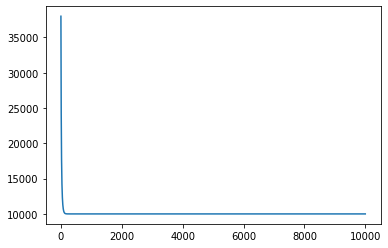

In [209]:
plt.plot(gd_track)
plt.show()

### SGD

In [ ]:
%%time

sgd_track, sgd_weights = stochastic_gradient_descent(X, y, 0.01, 10000)

CPU times: user 47.5 s, sys: 26.2 s, total: 1min 13s
Wall time: 40.2 s


In [ ]:
sgd_prediction = predict(X, sgd_weights)

sgd_metric = r2_score(y, sgd_prediction)

print(f'При классическом градиентном спуске r2 = {sgd_metric}')

При классическом градиентном спуске r2 = 0.7311661487685339



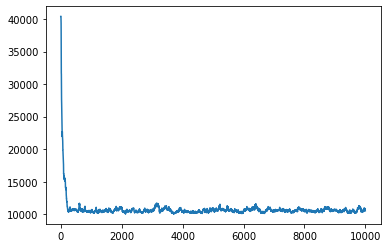

In [ ]:
plt.plot(sgd_track)
plt.show()

### Ответы на вопросы:

1) С нахождением минунима не справился **стохастический градиентный спуск**, так как на каждой итерации он считает градиент на рандомном объекте, поэтому у нас нет гарантии, что на последней итерации, ему попадется объект, градиент которого ведет в минимум.

2) Стохастический градиентный спуск работает медленнее всех, что очень странно, видимо, это связано не с самой оптимальной реализацией кода.

3) Графики смотрите выше.

4) С задачей лучше всего справились аналитическое решение и классический градиентный спуск. 

## Задание 7 (2 балла).

* **(1 балл)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему? 

In [245]:
def sgd_l2(X, y, learning_rate, iterations, l2):
    # добавляем столбец из единиц
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # случайные веса
    params = np.random.rand(X.shape[1])
    # массив для лоссов 
    cost_track = np.zeros((iterations, 1))
    for i in range(iterations):
      # рандомное наблюдение
      random_idx = np.random.randint(len(X - 1))
      x = X[random_idx]
      y_current = y[random_idx]
      error = x @ params - y_current
      # обновление весов
      params_0 = params - learning_rate * (x * error)
      Lw = x * error + l2 * params
      params_1 = params - learning_rate  * Lw
      params = np.hstack((params_0[0], params_1[1:]))
      # добавляем лосс в список
      cost_track[i] = compute_cost(X, y, params)
    
    return cost_track, params

In [246]:
scores = []

for l2 in np.linspace(0.1, 1, 10):
  sgd_l2_track, sgd_l2_weights = sgd_l2(X, y, 0.01, 10000, l2)
  score = r2_score(y, predict(X, sgd_l2_weights))

  scores.append(score)

In [247]:
scores

[0.7391345605244131,
 0.7325797384239254,
 0.7206985027173537,
 0.7191910994586257,
 0.7065160129150756,
 0.641492194646716,
 0.6832149900659188,
 0.6444914291903547,
 0.6524087030989689,
 0.6123032094460792]

Наивысшая метрика при наименьшем коэффициенте регуляризации, и с каждым его увеличением, метрика постепенно падает, это связано с тем, что на каждой итерации веса занижаются все ниже и ниже и к какому-то моменту они оказываются черезмерно занижеными, что ведет уже к **недообучению**.